In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

In [4]:
data = pd.read_csv("../data/processed/all_features.csv", index_col=0)

In [5]:
df = pd.read_pickle("../data/processed/finbert_probs_only_qa.pkl")

In [6]:
merged_df = pd.merge(df, data, how='left', left_index=True, right_index=True)

In [20]:
merged_df.index.name = 'Index'
merged_df = merged_df.sort_values(['date', 'Index'])

In [21]:
pead = merged_df[-4054:]

In [22]:
list_y = ['change_during_news', 'change_day_after', 'change_week_after', 'change_month_after']

In [63]:
score_diff = pead['positive'] - pead['negative']
bounds = [-1000000]
nb = 4
for b in range(nb-1):
    bounds.append(np.percentile(score_diff, int((b+1)*100/nb)))
bounds.append(100000)
results = {}
for i in list_y:
    current_y = pead[i]
    # Initialize the variables
    money_for_each_bet = 1
    money = np.zeros(nb)
    nb_bets = np.zeros(nb)
    for index, score in enumerate(score_diff):
        for number in range(nb):
        # Check if the current score difference is within the desired percentiles
            if score > bounds[number] and score < bounds[number+1]:
                money[number] += current_y.iloc[index] * money_for_each_bet
                nb_bets[number] += 1
    results[i] = money / nb_bets

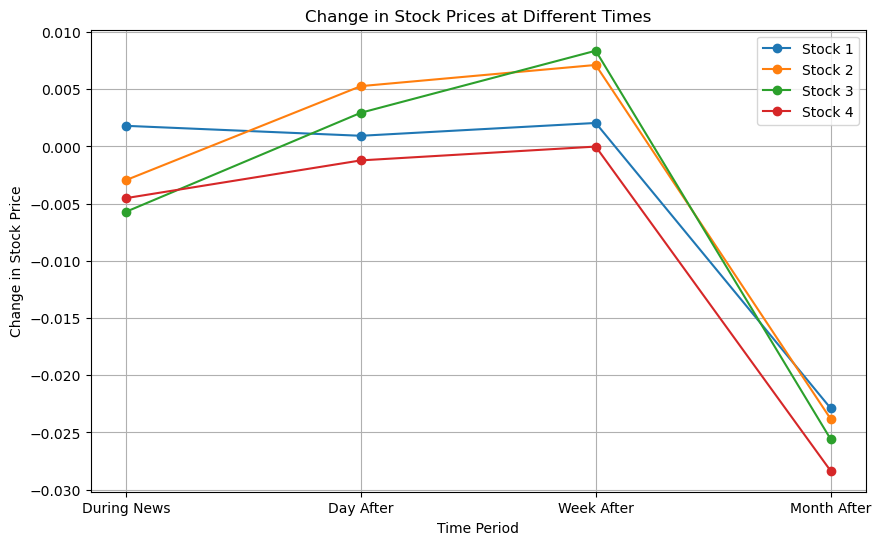

In [64]:
# Time periods as the x-axis
time_periods = ['During News', 'Day After', 'Week After', 'Month After']

# Creating the plot
plt.figure(figsize=(10, 6))
for i in range(len(results['change_during_news'])):
    # Extract one value from each key for the ith line
    changes = [results[key][i] for key in results]
    plt.plot(time_periods, changes, marker='o', label=f'Stock {i+1}')

plt.title('Change in Stock Prices at Different Times')
plt.xlabel('Time Period')
plt.ylabel('Change in Stock Price')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
last = []
for i in range(len(results['change_during_news'])):
    # Extract one value from each key for the ith line
    last.append([results[key][i] for key in results][-1])
last.reverse()

In [66]:
# Compute the Kendall Tau correlation
tau, p_value = kendalltau(last, range(len(results['change_during_news'])))

print("Kendall correlation coefficient:", tau)
print("P-value of the correlation:", p_value)

Kendall correlation coefficient: 1.0
P-value of the correlation: 0.08333333333333333
